# This notebook destined for visualisation. Enjoy

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.subplots import make_subplots 
import plotly.graph_objects as go
import cegaltools as cwp


import missingno as msno

In [5]:
data = pd.read_csv('train.csv',sep=';')

data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [25]:
data['DRHO'].describe()

count    987857.000000
mean          0.012196
std           7.477798
min       -7429.338867
25%          -0.009253
50%           0.001752
75%           0.021702
max           2.836938
Name: DRHO, dtype: float64

Inspecting available logs and interpretations (from the starter notebook)
The data contains the metadata columns

WELL: well name
DEPTH_MD: measured depth
X_LOC: UTM X coordinate
Y_LOC: UTM Y coordinate
Z_LOC: DEPTH
GROUP: NPD lithostratigraphy group
FORMATION: NPD lithostratgraphy formation
The data contains the well log curves. For example the following:

BS: Bit Size
CALI: Caliper
RDEP: Deep Resistivity
RHOB: Bulk Density
GR: Raw gamma data
SGR: Spectral Gamma Ray
RMED: Medium Resistivity
ROP: Rate of Penetration
NPHI: Neutron Porosity
PEF: Photoelectric Absorption Factor
RSHA: Shallow Resistivity
DTS: Sonic (Sheer Slowness)
DTC: Sonic (Compressional Slowness)
See contest page for full list.

as well as the interpretation

FORCE_2020_LITHOFACIES_LITHOLOGY: lithology class label
FORCE_2020_LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)
There is a total of 93 wells in the training dataset. The WELL column is included so the data can be separated per well. This will be necessary for any "windowed" approaches where we use non-local information in the ML features.

Text(0, 0.5, 'Процент заполненности (\\%)')

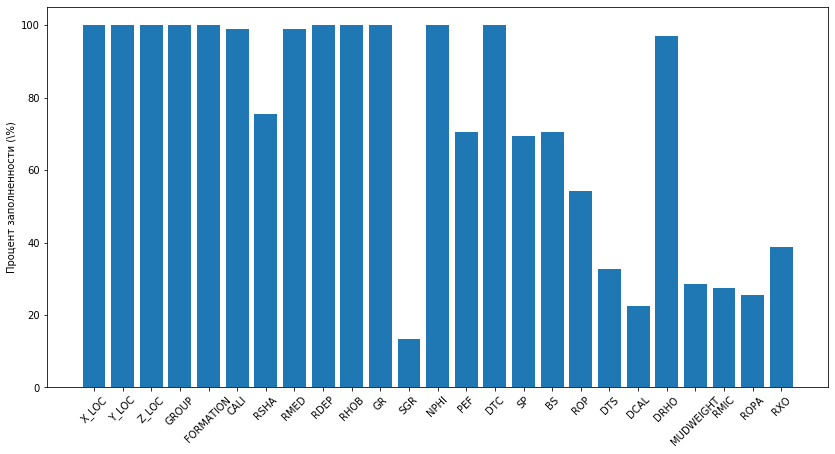

In [22]:
occurences = np.zeros(25)
for well in data['WELL'].unique():
    occurences += data[data['WELL'] == well].isna().all().astype(int).values[2:-2]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(data.WELL.unique().shape[0]-occurences)/data.WELL.unique().shape[0]*100.0)
ax.set_xticklabels(data.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_ylabel('Процент заполненности (\%)')

# Interactive visualization of missing logs

In [8]:
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [9]:
wells = data['WELL'].unique()
wells

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

In [10]:
@interact
def data_well_view(WELL=''):
    return data[data['WELL']==WELL]

interactive(children=(Text(value='', description='WELL'), Output()), _dom_classes=('widget-interact',))

In [11]:
well_items = data['WELL'].unique()

In [12]:
def plot_missingno(w):  
    msno.matrix(w, color=(0., 0., 0.45))   
    fig = plt.gcf()
    fig.set_size_inches(20, np.round(len(w)/750)) # plot heigth proportional to selected well's length (in rows)
    plt.show()
    
def data_missingno_view(WELL=''):
    return plot_missingno(data.loc[data['WELL']==WELL])

well_select = widgets.Select(options=well_items)
interactive(data_missingno_view, WELL=well_select)

interactive(children=(Select(description='WELL', options=('15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A…

# Interactive well plotting based on plotting routine from the starter notebook

In [13]:
def plot_well(w):
    fig, axs = plt.subplots(1, len(w.columns)-9, sharey=True)
    fig.set_size_inches(20, np.round(len(w)/750))
    for ic, col in enumerate(set(w.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                         'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                        'X_LOC', 'Y_LOC', 'Z_LOC'])):
        axs[ic].plot(w[col], w['DEPTH_MD'])
        axs[ic].set_xlabel(col)
    axs[0].set_ylim(w['DEPTH_MD'].values[-1], w['DEPTH_MD'].values[0])
    plt.show()

In [14]:
def well_plot_view(WELL=''):
    return plot_well(data.loc[data['WELL']==WELL])

well_select = widgets.Select(options=well_items)
interactive(well_plot_view, WELL=well_select)

interactive(children=(Select(description='WELL', options=('15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A…

# Interactive well plotting based on plotting routine from the Cegal notebook

In [15]:
from cegaltools.plotting import CegalWellPlotter as cwp

In [16]:
data['FORCE_2020_LITHOFACIES_CONFIDENCE'] = 1/data['FORCE_2020_LITHOFACIES_CONFIDENCE']

In [19]:
def plot_well_cegal(w):
    cwp.plot_logs(df=w.set_index('DEPTH_MD'),
                  logs=['NPHI', 'RHOB', 'GR', 'NPHI', 'DTC', 'DTS', 'ROP','SP','DRHO'], 
                  log_scale_logs=['RMED', 'RDEP'],
                  lithology_logs='FORCE_2020_LITHOFACIES_LITHOLOGY', 
                  lithology_proba_logs='FORCE_2020_LITHOFACIES_CONFIDENCE')

In [20]:
def well_plot_cegal_view(WELL=''):
    return plot_well_cegal(data.loc[data['WELL']==WELL])

well_select = widgets.Select(options=well_items)
interactive(well_plot_cegal_view, WELL=well_select)

interactive(children=(Select(description='WELL', options=('15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A…

In [23]:
def CorrMatrix(dataset):
    
    corr = dataset.corr(method='spearman')
    x = plt.figure(figsize=(20,12))
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200, ),
    square=True, 
 )
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
 );
    
    

    
def corr_plot(WELL=''):
    return CorrMatrix(data.loc[data['WELL']==WELL])

well_select = widgets.Select(options=well_items)
interactive(corr_plot, WELL=well_select)

interactive(children=(Select(description='WELL', options=('15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A…